In [2]:
df = read.csv('data_final.csv')
print(head(df))

  X      WHO.Region ISO3 WHO.Country.Name   City.or.Locality Measurement.Year
1 0 European Region  ALB          Albania            Elbasan             2015
2 1 European Region  ALB          Albania            Elbasan             2016
3 2 European Region  AND          Andorra Escaldes-Engordany             2012
4 3 European Region  AND          Andorra Escaldes-Engordany             2014
5 4 European Region  AND          Andorra Escaldes-Engordany             2015
6 5 European Region  AND          Andorra Escaldes-Engordany             2016
  NO2....g.m3. NO2.temporal.coverage.... Population Average.NO2
1        23.96                  97.85388    2880703       23.96
2        26.26                  96.04964    2876101       26.26
3        31.64                 100.00000      71013       31.64
4        27.62                 100.00000      71621       27.62
5        26.65                  94.55479      71746       26.65
6        26.98                  94.96812      72540       26.98


In [3]:
summary(df)

       X          WHO.Region            ISO3           WHO.Country.Name  
 Min.   :    0   Length:16364       Length:16364       Length:16364      
 1st Qu.: 4091   Class :character   Class :character   Class :character  
 Median : 8182   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 8182                                                           
 3rd Qu.:12272                                                           
 Max.   :16363                                                           
 City.or.Locality   Measurement.Year  NO2....g.m3.   NO2.temporal.coverage....
 Length:16364       Min.   :2010     Min.   : 0.00   Min.   : 90.01           
 Class :character   1st Qu.:2014     1st Qu.:11.86   1st Qu.: 94.93           
 Mode  :character   Median :2016     Median :18.50   Median : 97.35           
                    Mean   :2016     Mean   :20.12   Mean   : 96.80           
                    3rd Qu.:2018     3rd Qu.:26.71   3rd Qu.: 99.13           
        

In [4]:
unique_region <- unique(df$WHO.Region)
print(unique_region)

[1] "European Region"              "Region of the Americas"      
[3] "Western Pacific Region"       "South East Asia Region"      
[5] "Eastern Mediterranean Region"


In [5]:
unique_iso <- unique(df$ISO3)
print(unique_iso)

 [1] "ALB" "AND" "ARG" "AUS" "AUT" "BEL" "BGD" "BGR" "BIH" "BRA" "CAN" "CHE"
[13] "CHL" "COL" "CRI" "CYP" "CZE" "DEU" "DNK" "ESP" "EST" "FIN" "FRA" "GBR"
[25] "GRC" "HRV" "HUN" "IND" "IRL" "ISL" "ITA" "JOR" "JPN" "KWT" "LTU" "LUX"
[37] "LVA" "MCO" "MEX" "MKD" "MLT" "MMR" "MNE" "NLD" "NOR" "POL" "PRT" "QAT"
[49] "ROU" "SGP" "SRB" "SVN" "SWE" "THA"


In [6]:
unique_country <- unique(df$WHO.Country.Name)
print(unique_country)

 [1] "Albania"                "Andorra"                "Argentina"             
 [4] "Australia"              "Austria"                "Belgium"               
 [7] "Bangladesh"             "Bulgaria"               "Bosnia and Herzegovina"
[10] "Brazil"                 "Canada"                 "Switzerland"           
[13] "Chile"                  "Colombia"               "Costa Rica"            
[16] "Cyprus"                 "Czechia"                "Germany"               
[19] "Denmark"                "Spain"                  "Estonia"               
[22] "Finland"                "France"                 "United Kingdom"        
[25] "Greece"                 "Croatia"                "Hungary"               
[28] "India"                  "Ireland"                "Iceland"               
[31] "Italy"                  "Jordan"                 "Japan"                 
[34] "Kuwait"                 "Lithuania"              "Luxembourg"            
[37] "Latvia"                 "Monaco"  

Average.NO2 is Average NO2 for country

2010, 2014 to 2019



In [7]:
library(dplyr)

# Balancing data choosing countries with data for years 2010, 2016, 2017, and 2018
years_to_keep <- c(2010, 2016, 2017, 2018)

# balanced data
years_to_keep <- c(2010, 2014, 2015, 2016, 2017, 2018)

# Filter the data frame
filtered_df <- df %>%
  group_by(WHO.Country.Name) %>%
  filter(all(years_to_keep %in% Measurement.Year))

# Display the filtered data frame
print(head(filtered_df))


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




# A tibble: 6 x 10
# Groups:   WHO.Country.Name [1]
      X WHO.Region      ISO3  WHO.Country.Name City.or.Locality Measurement.Year
  <int> <chr>           <chr> <chr>            <chr>                       <int>
1    48 European Region AUT   Austria          "Am Rechen"                  2013
2    49 European Region AUT   Austria          "Amstetten"                  2013
3    50 European Region AUT   Austria          "Bad V\u00f6sla~             2013
4    51 European Region AUT   Austria          "Biedermannsdor~             2013
5    52 European Region AUT   Austria          "Bludenz"                    2013
6    53 European Region AUT   Austria          "Bratislava"                 2013
# i 4 more variables: NO2....g.m3. <dbl>, NO2.temporal.coverage.... <dbl>,
#   Population <dbl>, Average.NO2 <dbl>


 [1] "X"                         "WHO.Region"               
 [3] "ISO3"                      "WHO.Country.Name"         
 [5] "City.or.Locality"          "Measurement.Year"         
 [7] "NO2....g.m3."              "NO2.temporal.coverage...."
 [9] "Population"                "Average.NO2"              


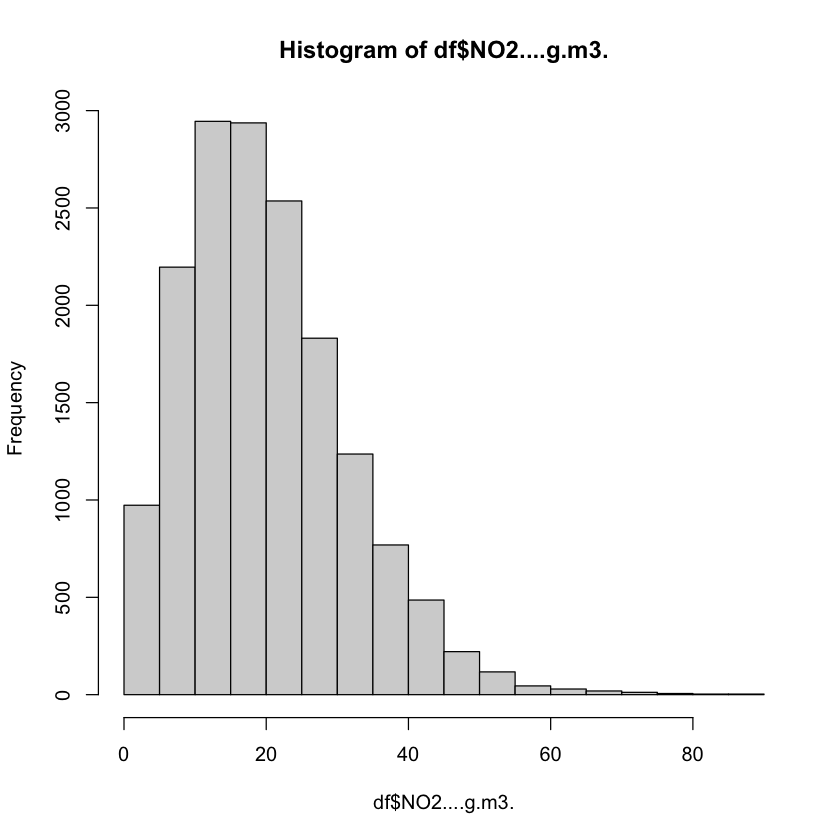

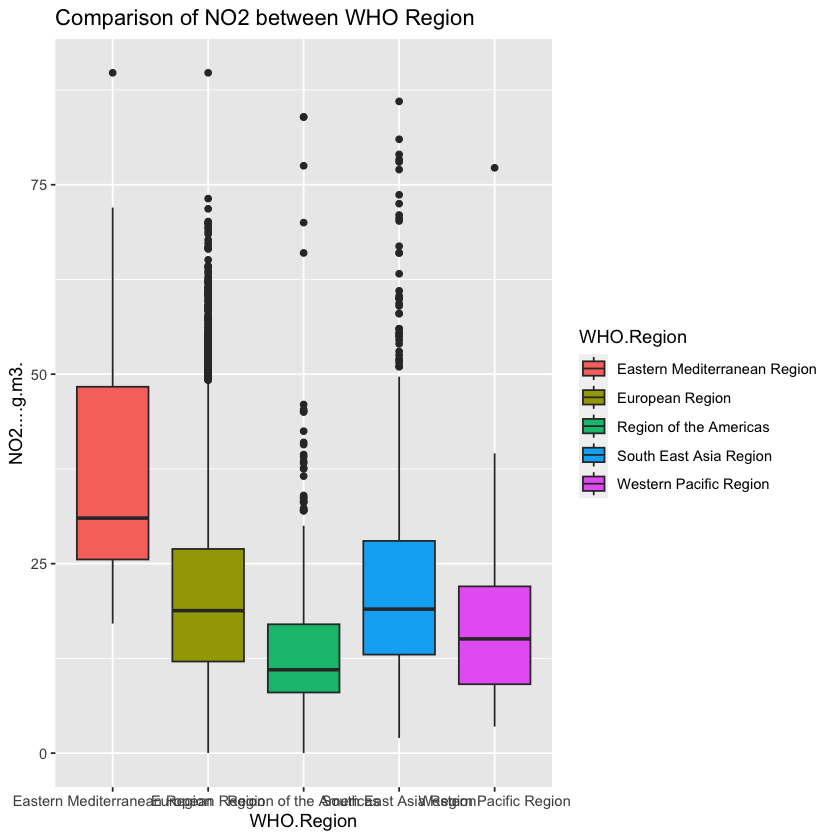

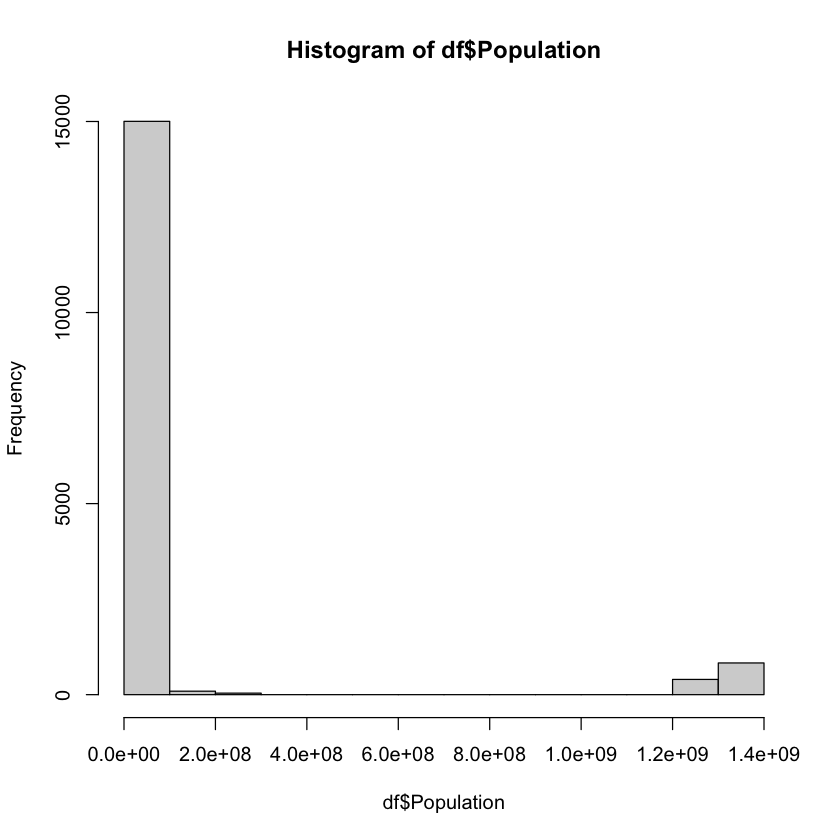

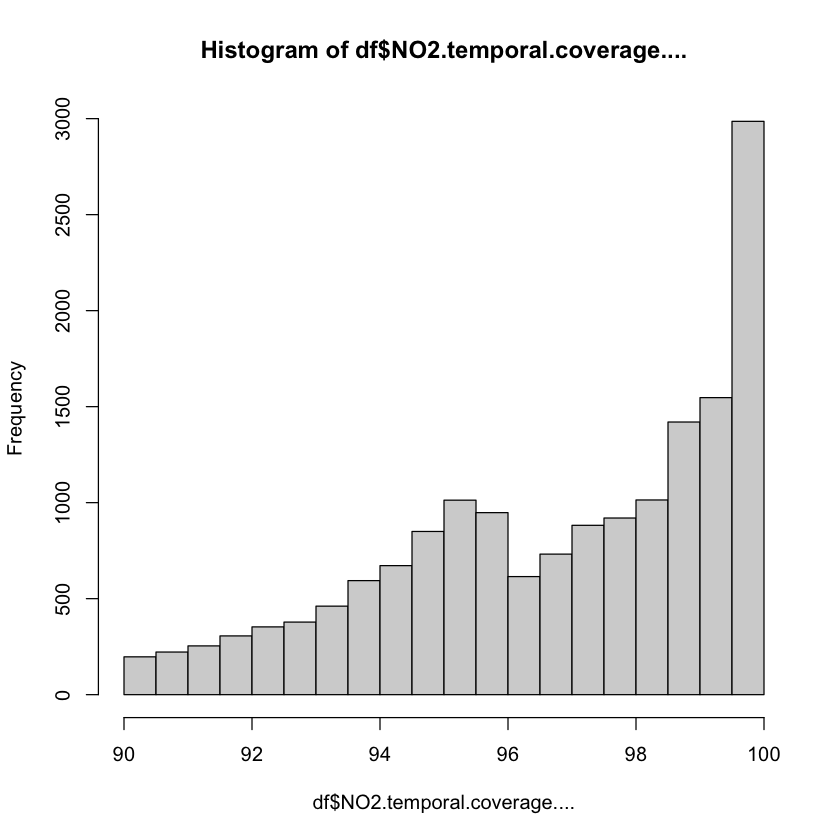

In [8]:
library(ggplot2)
print(names(df))

hist(df$NO2....g.m3.)

df %>%
  ggplot( aes(x = WHO.Region, y = NO2....g.m3., fill=WHO.Region)) +
  geom_boxplot() +ggtitle("Comparison of NO2 between WHO Region")

hist(df$Population)

hist(df$NO2.temporal.coverage....)



In [10]:

df1 <- subset(df, select=c(Measurement.Year, WHO.Country.Name))

df1 <- df1[order(df1$Measurement.Year), ]
df1

,Measurement.Year,WHO.Country.Name
,<int>,<chr>
779,2010,Austria
780,2010,Austria
781,2010,Austria
782,2010,Austria
783,2010,Austria
784,2010,Austria
785,2010,Austria
786,2010,Austria
787,2010,Austria
